<a href="https://colab.research.google.com/github/daniel-usp/risco/blob/main/LS_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long & Short

In [1]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
 
!pip install yfinance
import yfinance as yf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 6.4 MB 12.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [14]:
start_date = "2016-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
stock1 = "BTC-USD" #Variável Y
stock2 = "ETH-USD" #Variável X
ticker1 = stock1.split('.')[0]
ticker2 = stock2.split('.')[0]

df = yf.download([stock1, stock2], start = start_date, end = end_date)["Adj Close"]
df.columns=[ticker1,ticker2]
df.dropna(inplace=True)
df

[*********************100%***********************]  2 of 2 completed


,BTC-USD,ETH-USD
Date,,
2017-11-09,7143.580078,320.884003
2017-11-10,6618.140137,299.252991
2017-11-11,6357.600098,314.681000
2017-11-12,5950.069824,307.907990
2017-11-13,6559.490234,316.716003
...,...,...
2022-05-13,29283.103516,2014.418213
2022-05-14,30101.265625,2056.273926
2022-05-15,31305.113281,2145.706787


Text(0.5, 1.0, 'Pares de Ações')

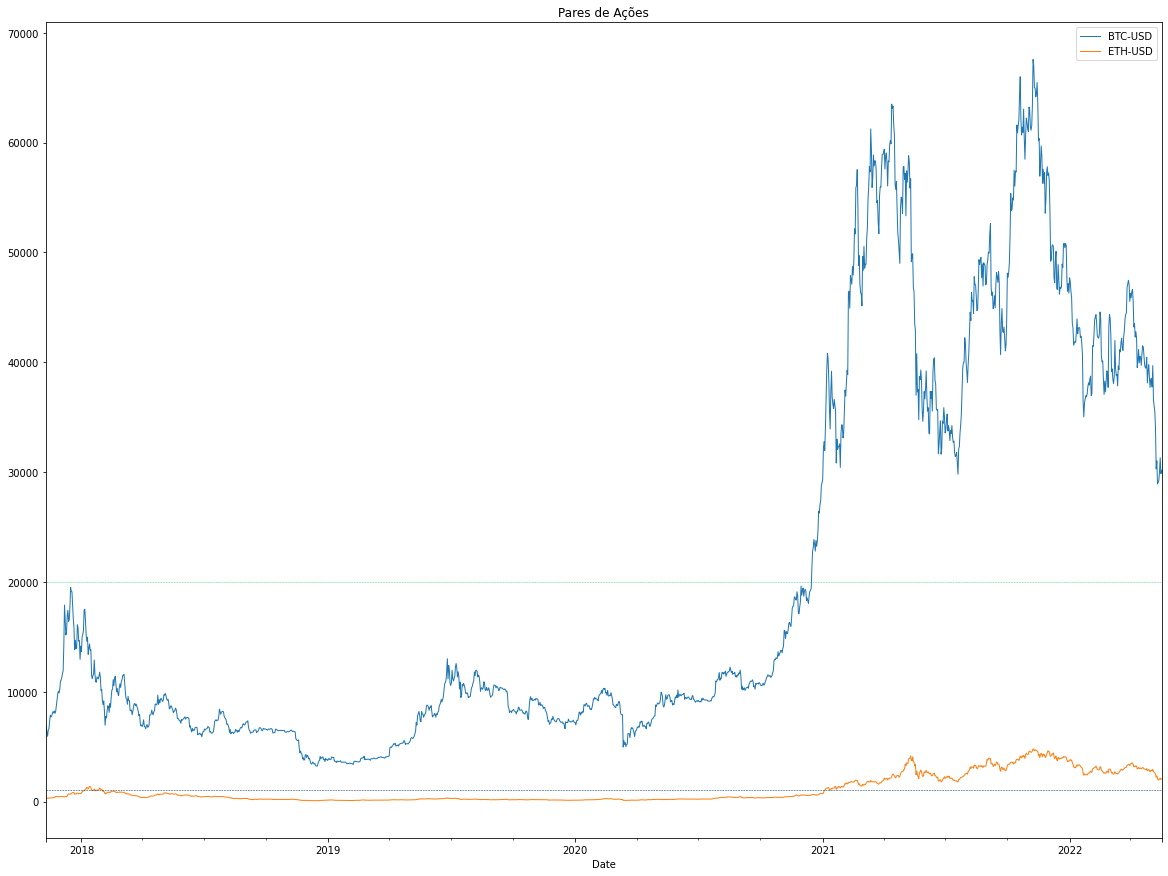

In [15]:
import matplotlib.pyplot as plt
mean_ticker1 = df[ticker1].mean()
mean_ticker2 = df[ticker2].mean()
ticker1 = stock1.split('.')[0]
ticker2 = stock2.split('.')[0]

df[[ticker1, ticker2]].plot(linewidth=1)
plt.axhline(y=mean_ticker1, color='#49ce8b', linestyle='--', linewidth=0.5)
plt.axhline(y=mean_ticker2, color='#033660', linestyle='--', linewidth=0.5)

plt.title("Pares de Ações")

In [16]:

df.corr()

,BTC-USD,ETH-USD
BTC-USD,1.000000,0.926945
ETH-USD,0.926945,1.000000


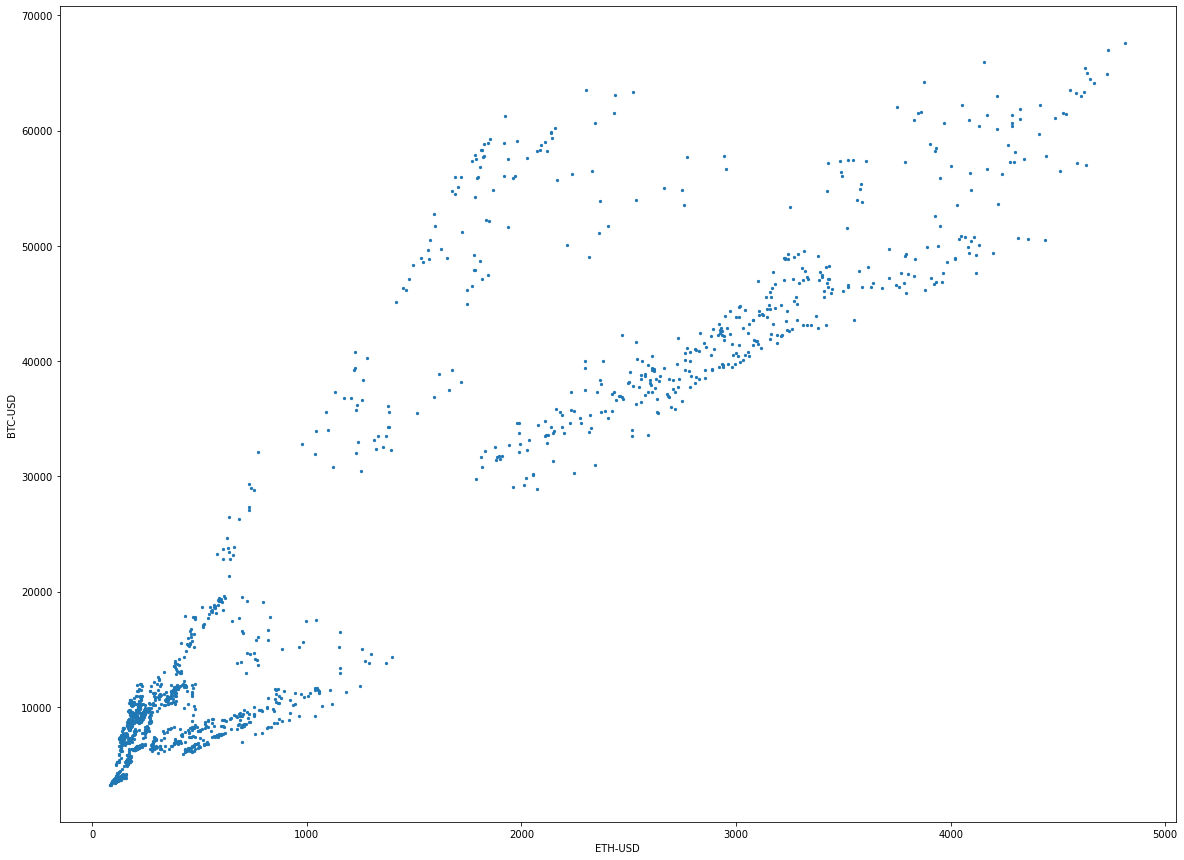

In [17]:
plt.scatter(df[ticker2], df[ticker1], s=5)
plt.rcParams["figure.figsize"] = (20,15)
plt.xlabel(ticker2)
plt.ylabel(ticker1)
plt.show()

In [18]:
# Linear regression

# values converted into a numpy array
X_independent = df.iloc[:,1].values.reshape(-1, 1)
Y_dependent = df.iloc[:,0].values.reshape(-1, 1) 

reg = LinearRegression().fit(X_independent, Y_dependent)

# get beta (angular coef of the linear regression)
beta = reg.coef_;
print('beta = %f' % beta)

# get b coef from (beta*x + b) of the linear regression)
a = reg.intercept_;
print('a = %f' % a)

# get the estimated Y values given X from the model
Y_predict = reg.predict(X_independent);

beta = 13.173048
a = 5674.837256


In [19]:
df['Residual'] = Y_dependent - Y_predict
df['ResidualPad'] = (df['Residual'] - df['Residual'].mean()) / df['Residual'].std()
df

,BTC-USD,ETH-USD,Residual,ResidualPad
Date,,,,
2017-11-09,7143.580078,320.884003,-2758.277459,-0.411236
2017-11-10,6618.140137,299.252991,-2998.771048,-0.447091
2017-11-11,6357.600098,314.681000,-3462.544986,-0.516236
2017-11-12,5950.069824,307.907990,-3780.854072,-0.563693
2017-11-13,6559.490234,316.716003,-3287.462050,-0.490133
...,...,...,...,...
2022-05-13,29283.103516,2014.418213,-2927.760993,-0.436504
2022-05-14,30101.265625,2056.273926,-2660.966187,-0.396727
2022-05-15,31305.113281,2145.706787,-2635.221881,-0.392889


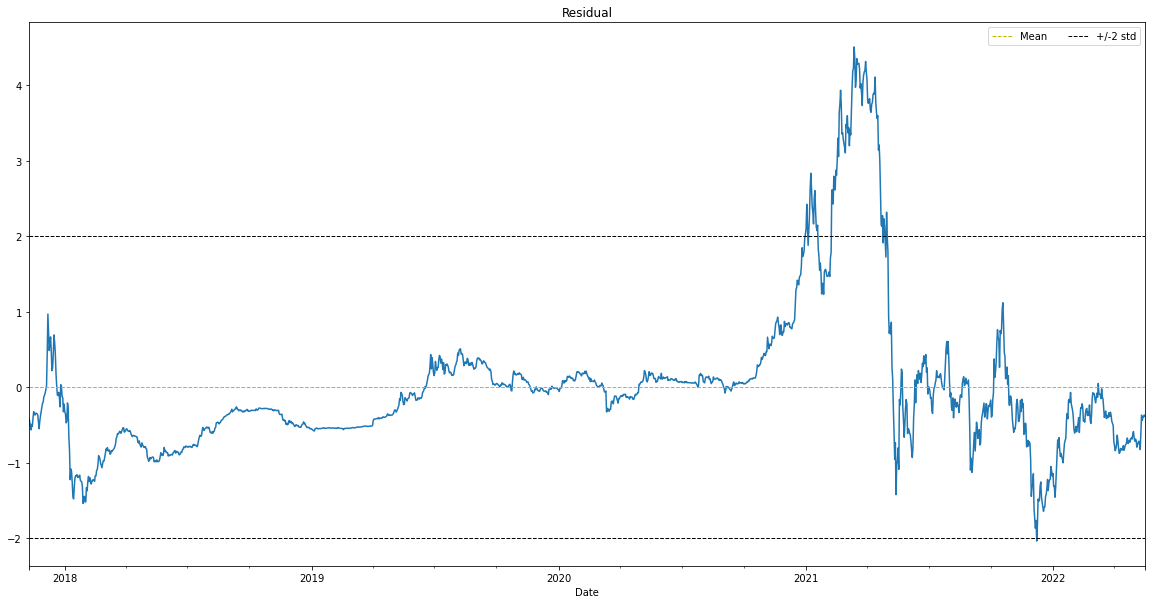

In [20]:
mean = 0
std  = 1
plt.rcParams["figure.figsize"] = (20,10)
    
k = 2  # Factor to shift the standard deviation 
up   = mean + std * k
down = mean - std * k

plt.title("Residual")

df['ResidualPad'].plot(x="Major", y="", label='_nolegend_')

plt.axhline(y=mean, color='y', linestyle='--', linewidth=1, label='Mean')
plt.axhline(y=up,   color='black', linestyle='--', linewidth=1, label=f'+/-{k} std')
plt.axhline(y=down, color='black', linestyle='--', linewidth=1, label='_nolegend_')

plt.legend(loc='upper right',ncol=2)

In [ ]:
datetime.today().strftime('%Y-%m-%d')

'2022-05-02'